In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.5/496.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.2 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO


In [ ]:
!pip install roboflow --quiet
from roboflow import Roboflow

In [ ]:
%cd /content/drive/MyDrive/New_Yolov8
from roboflow import Roboflow
rf = Roboflow(api_key="egIcFN3LYAWgMR54rm8u")
project = rf.workspace("detection-g824o").project("fruit-detection-hgqya")
dataset = project.version(4).download("yolov8")


[Errno 2] No such file or directory: '/content/drive/MyDrive/New_Yolov8'
/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.53, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Fruit-Detection-4 in yolov8:: 100%|██████████| 6968/6968 [00:00<00:00, 7049.03it/s]


In [ ]:
%cd '/content/Fruit-Detection-4'

!yolo task=detect mode=train model=yolov8s.pt data='/content/Fruit-Detection-4/data.yaml' epochs=25 imgsz=640 plots=True

/content/Fruit-Detection-4
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Fruit-Detection-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fals

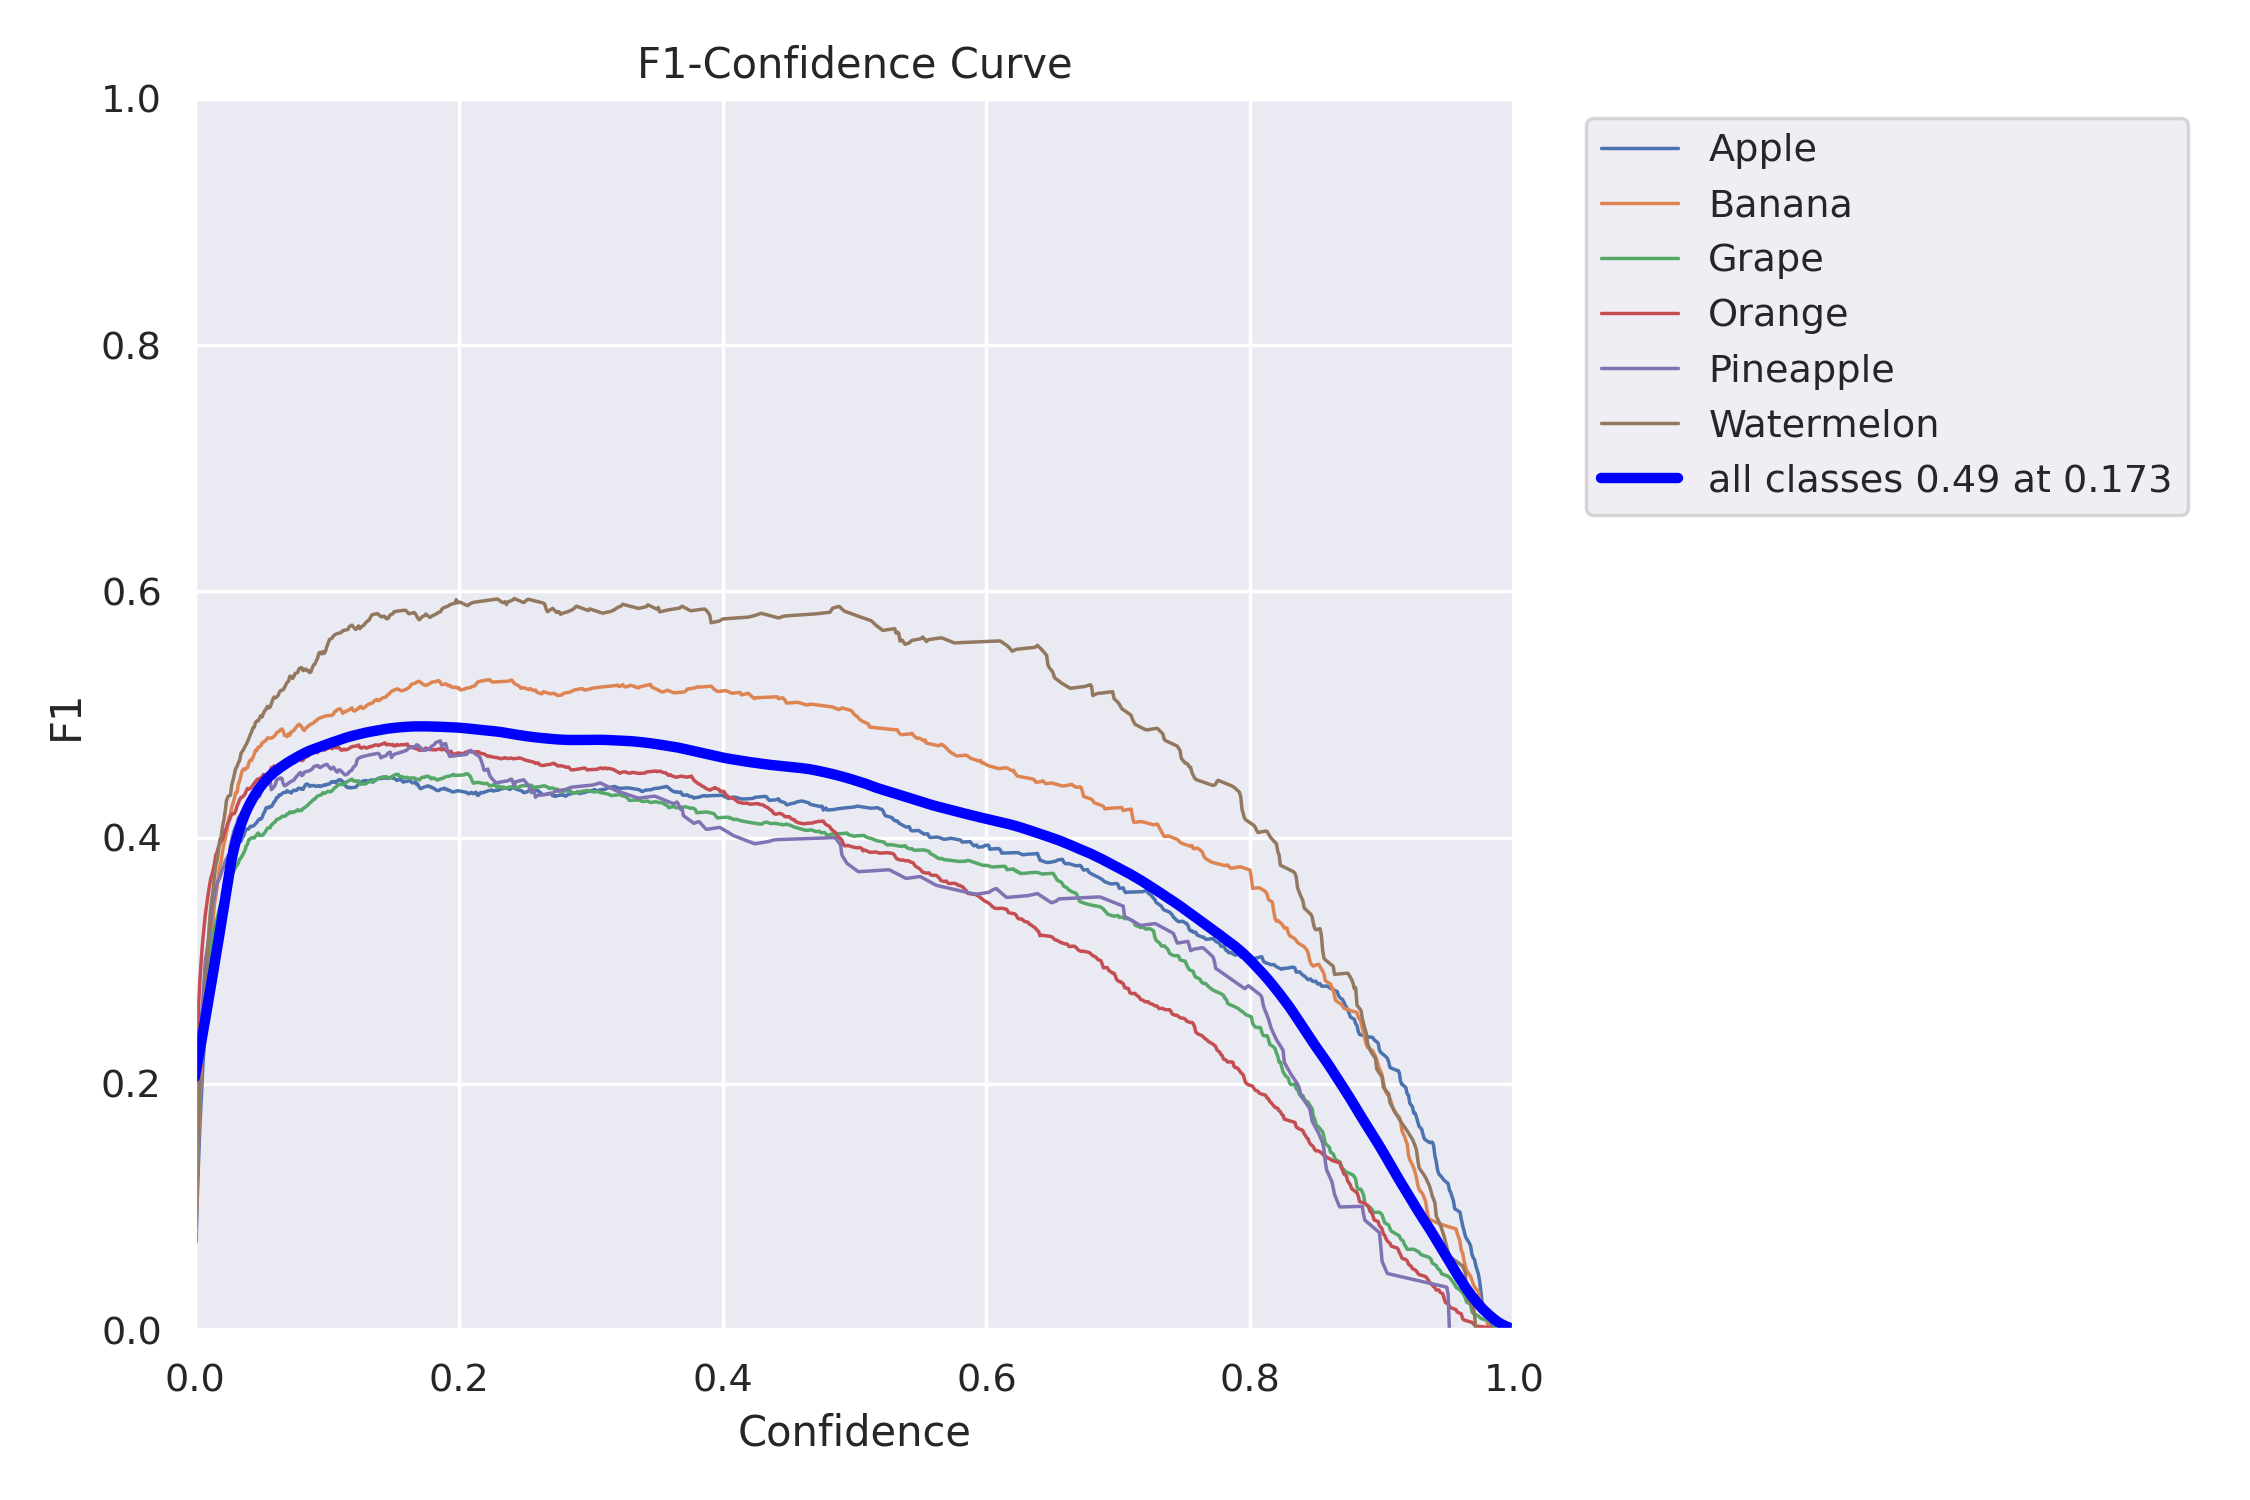

In [ ]:
from IPython.display import Image
display(Image("/content/Fruit-Detection-4/runs/detect/train2/F1_curve.png", width=400, height=400))

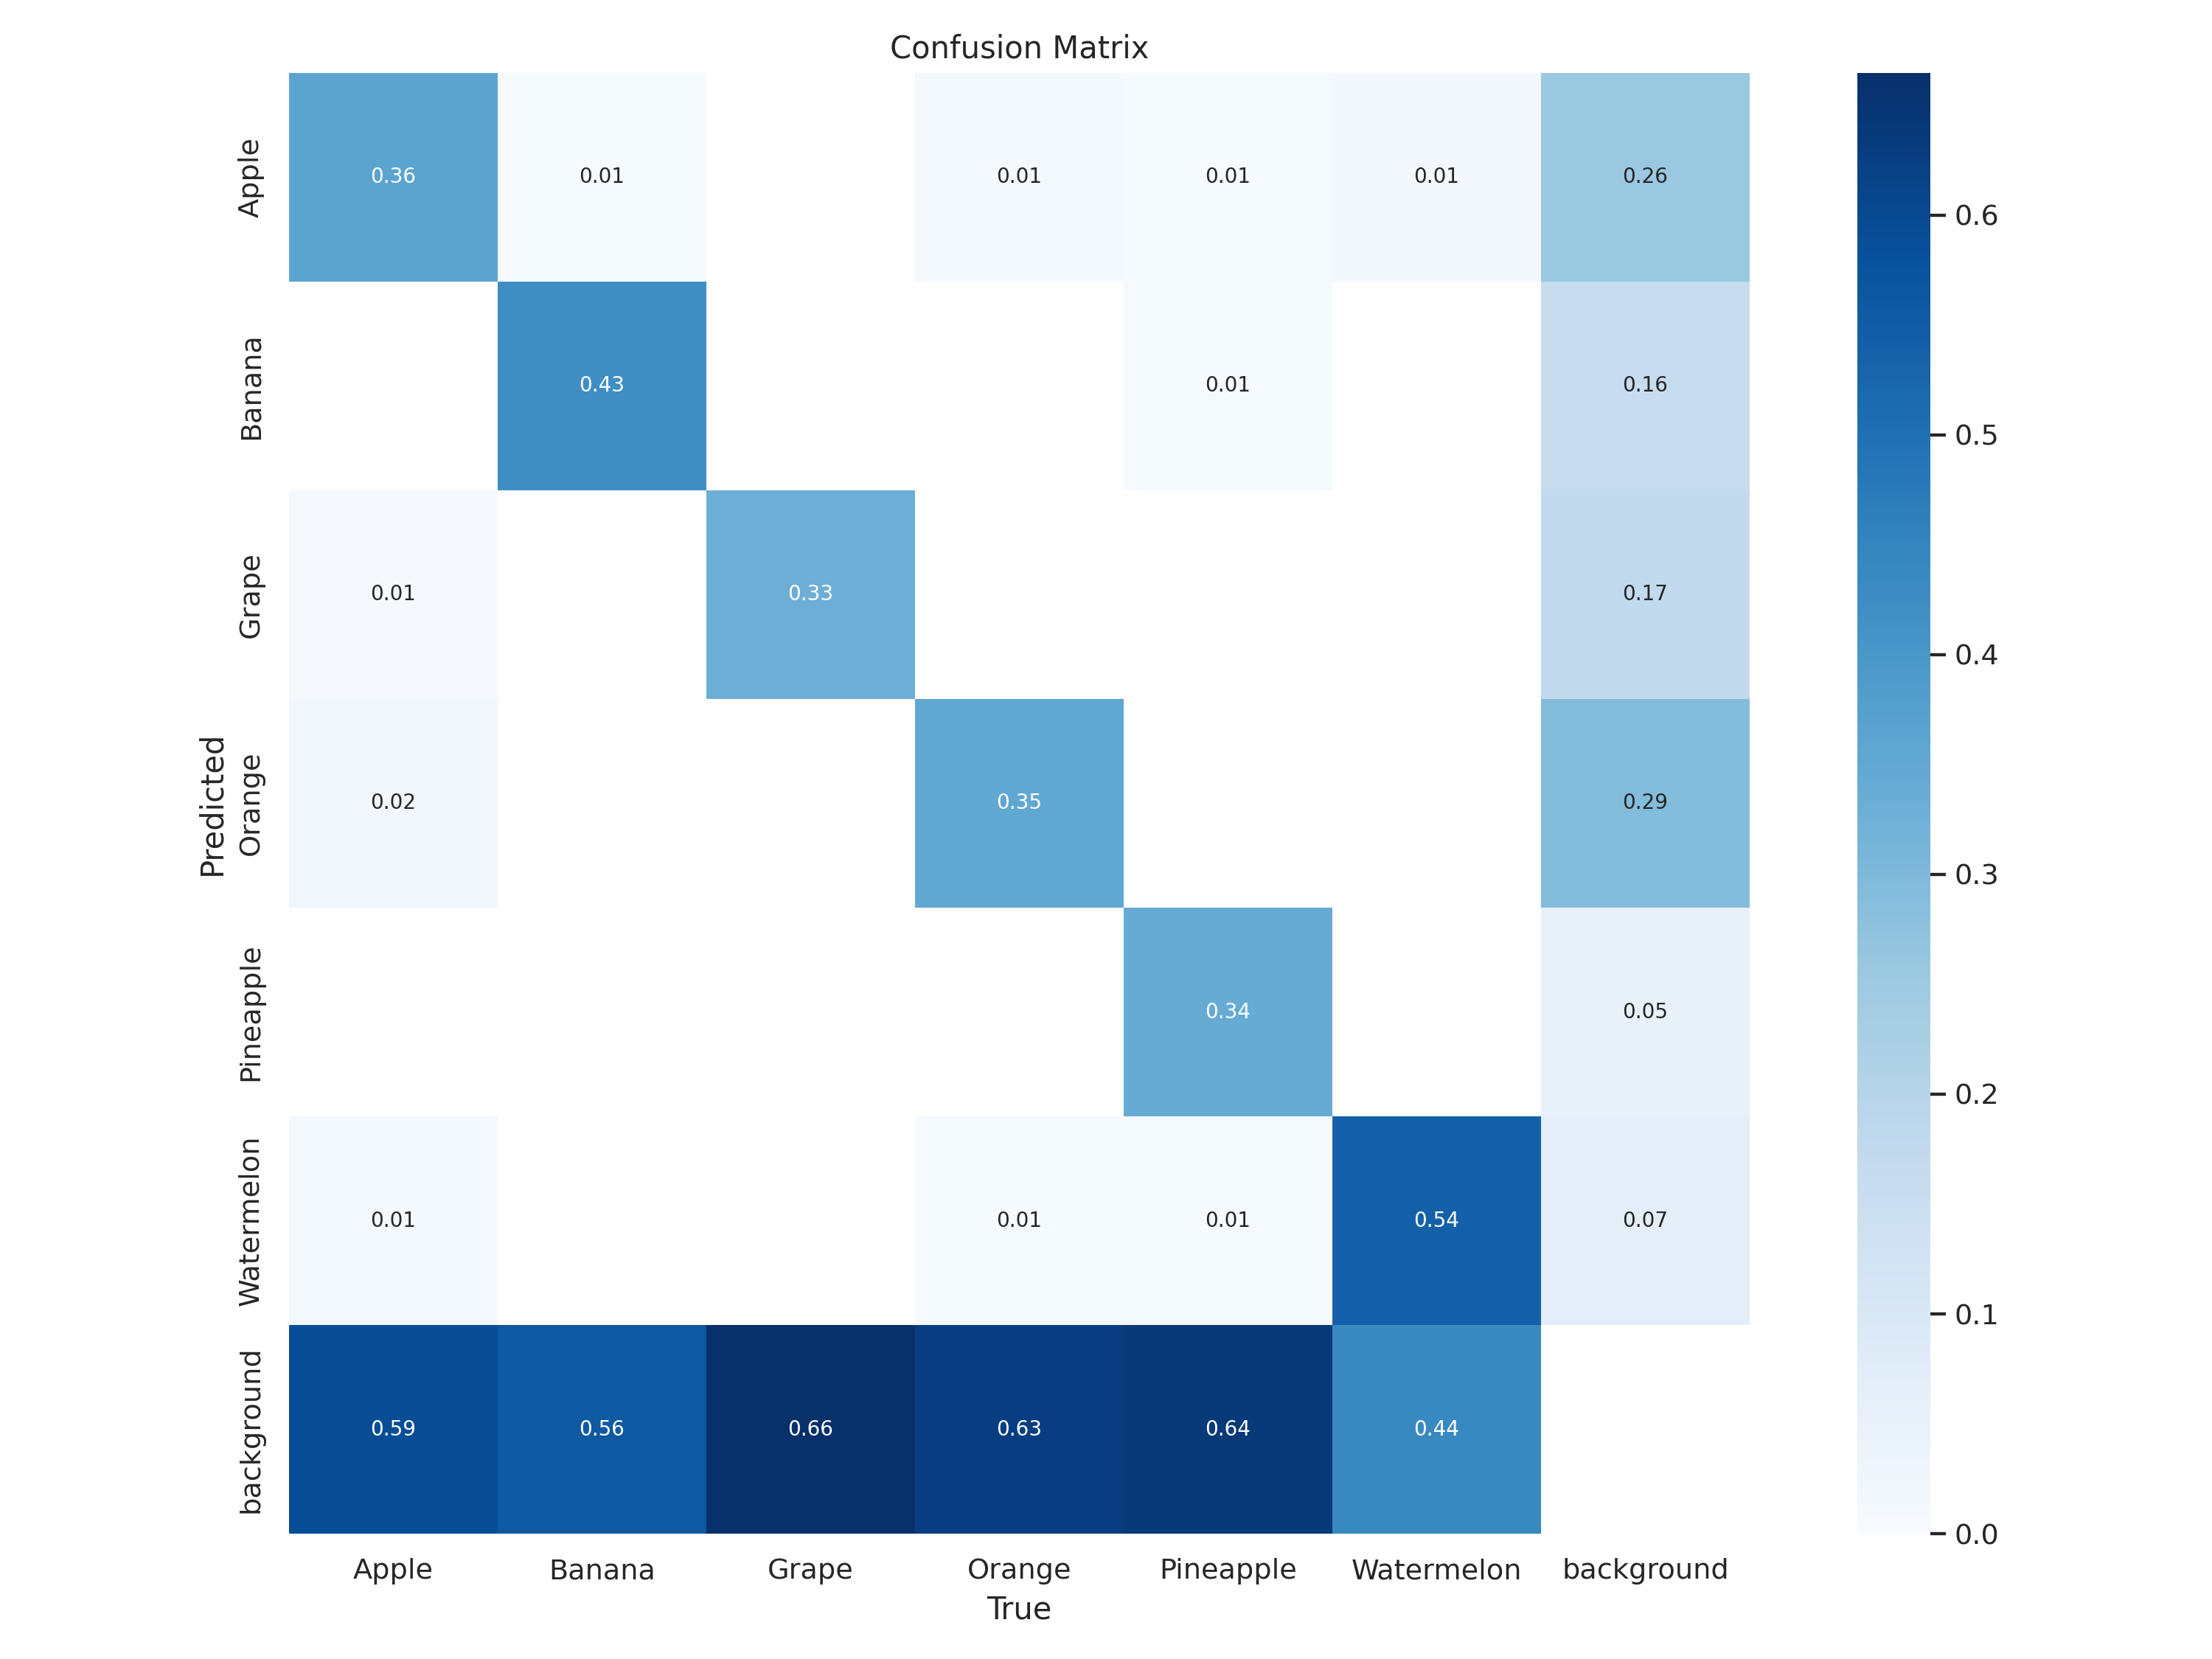

In [ ]:
from IPython.display import Image
display(Image("/content/Fruit-Detection-4/runs/detect/train2/confusion_matrix.png", width=400, height=400))

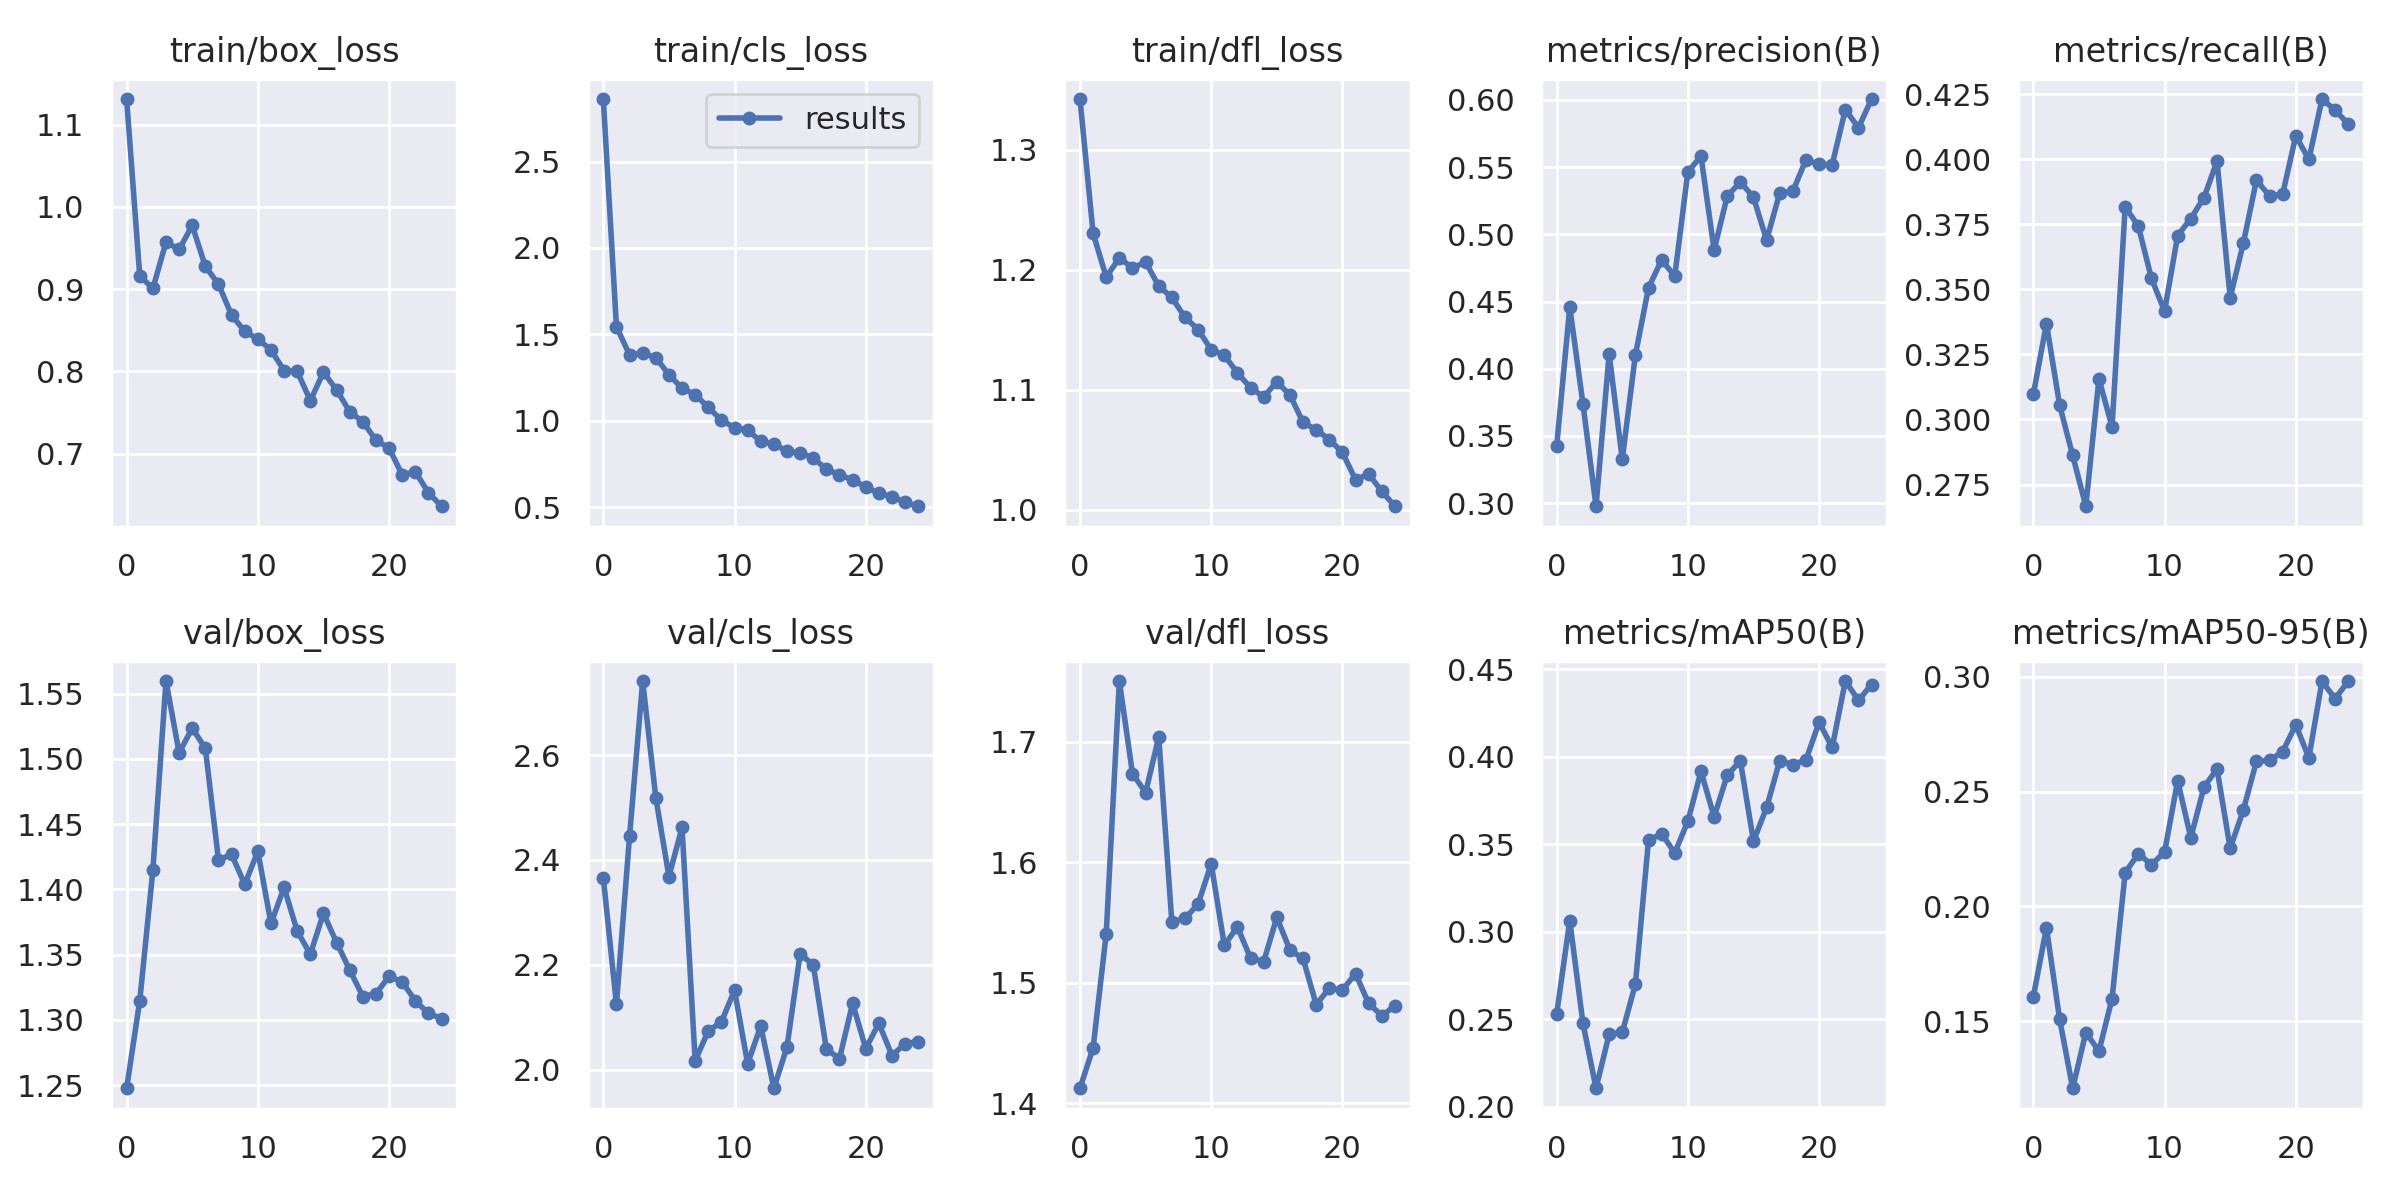

In [ ]:
from IPython.display import Image
display(Image("/content/Fruit-Detection-4/runs/detect/train2/results.png", width=600))

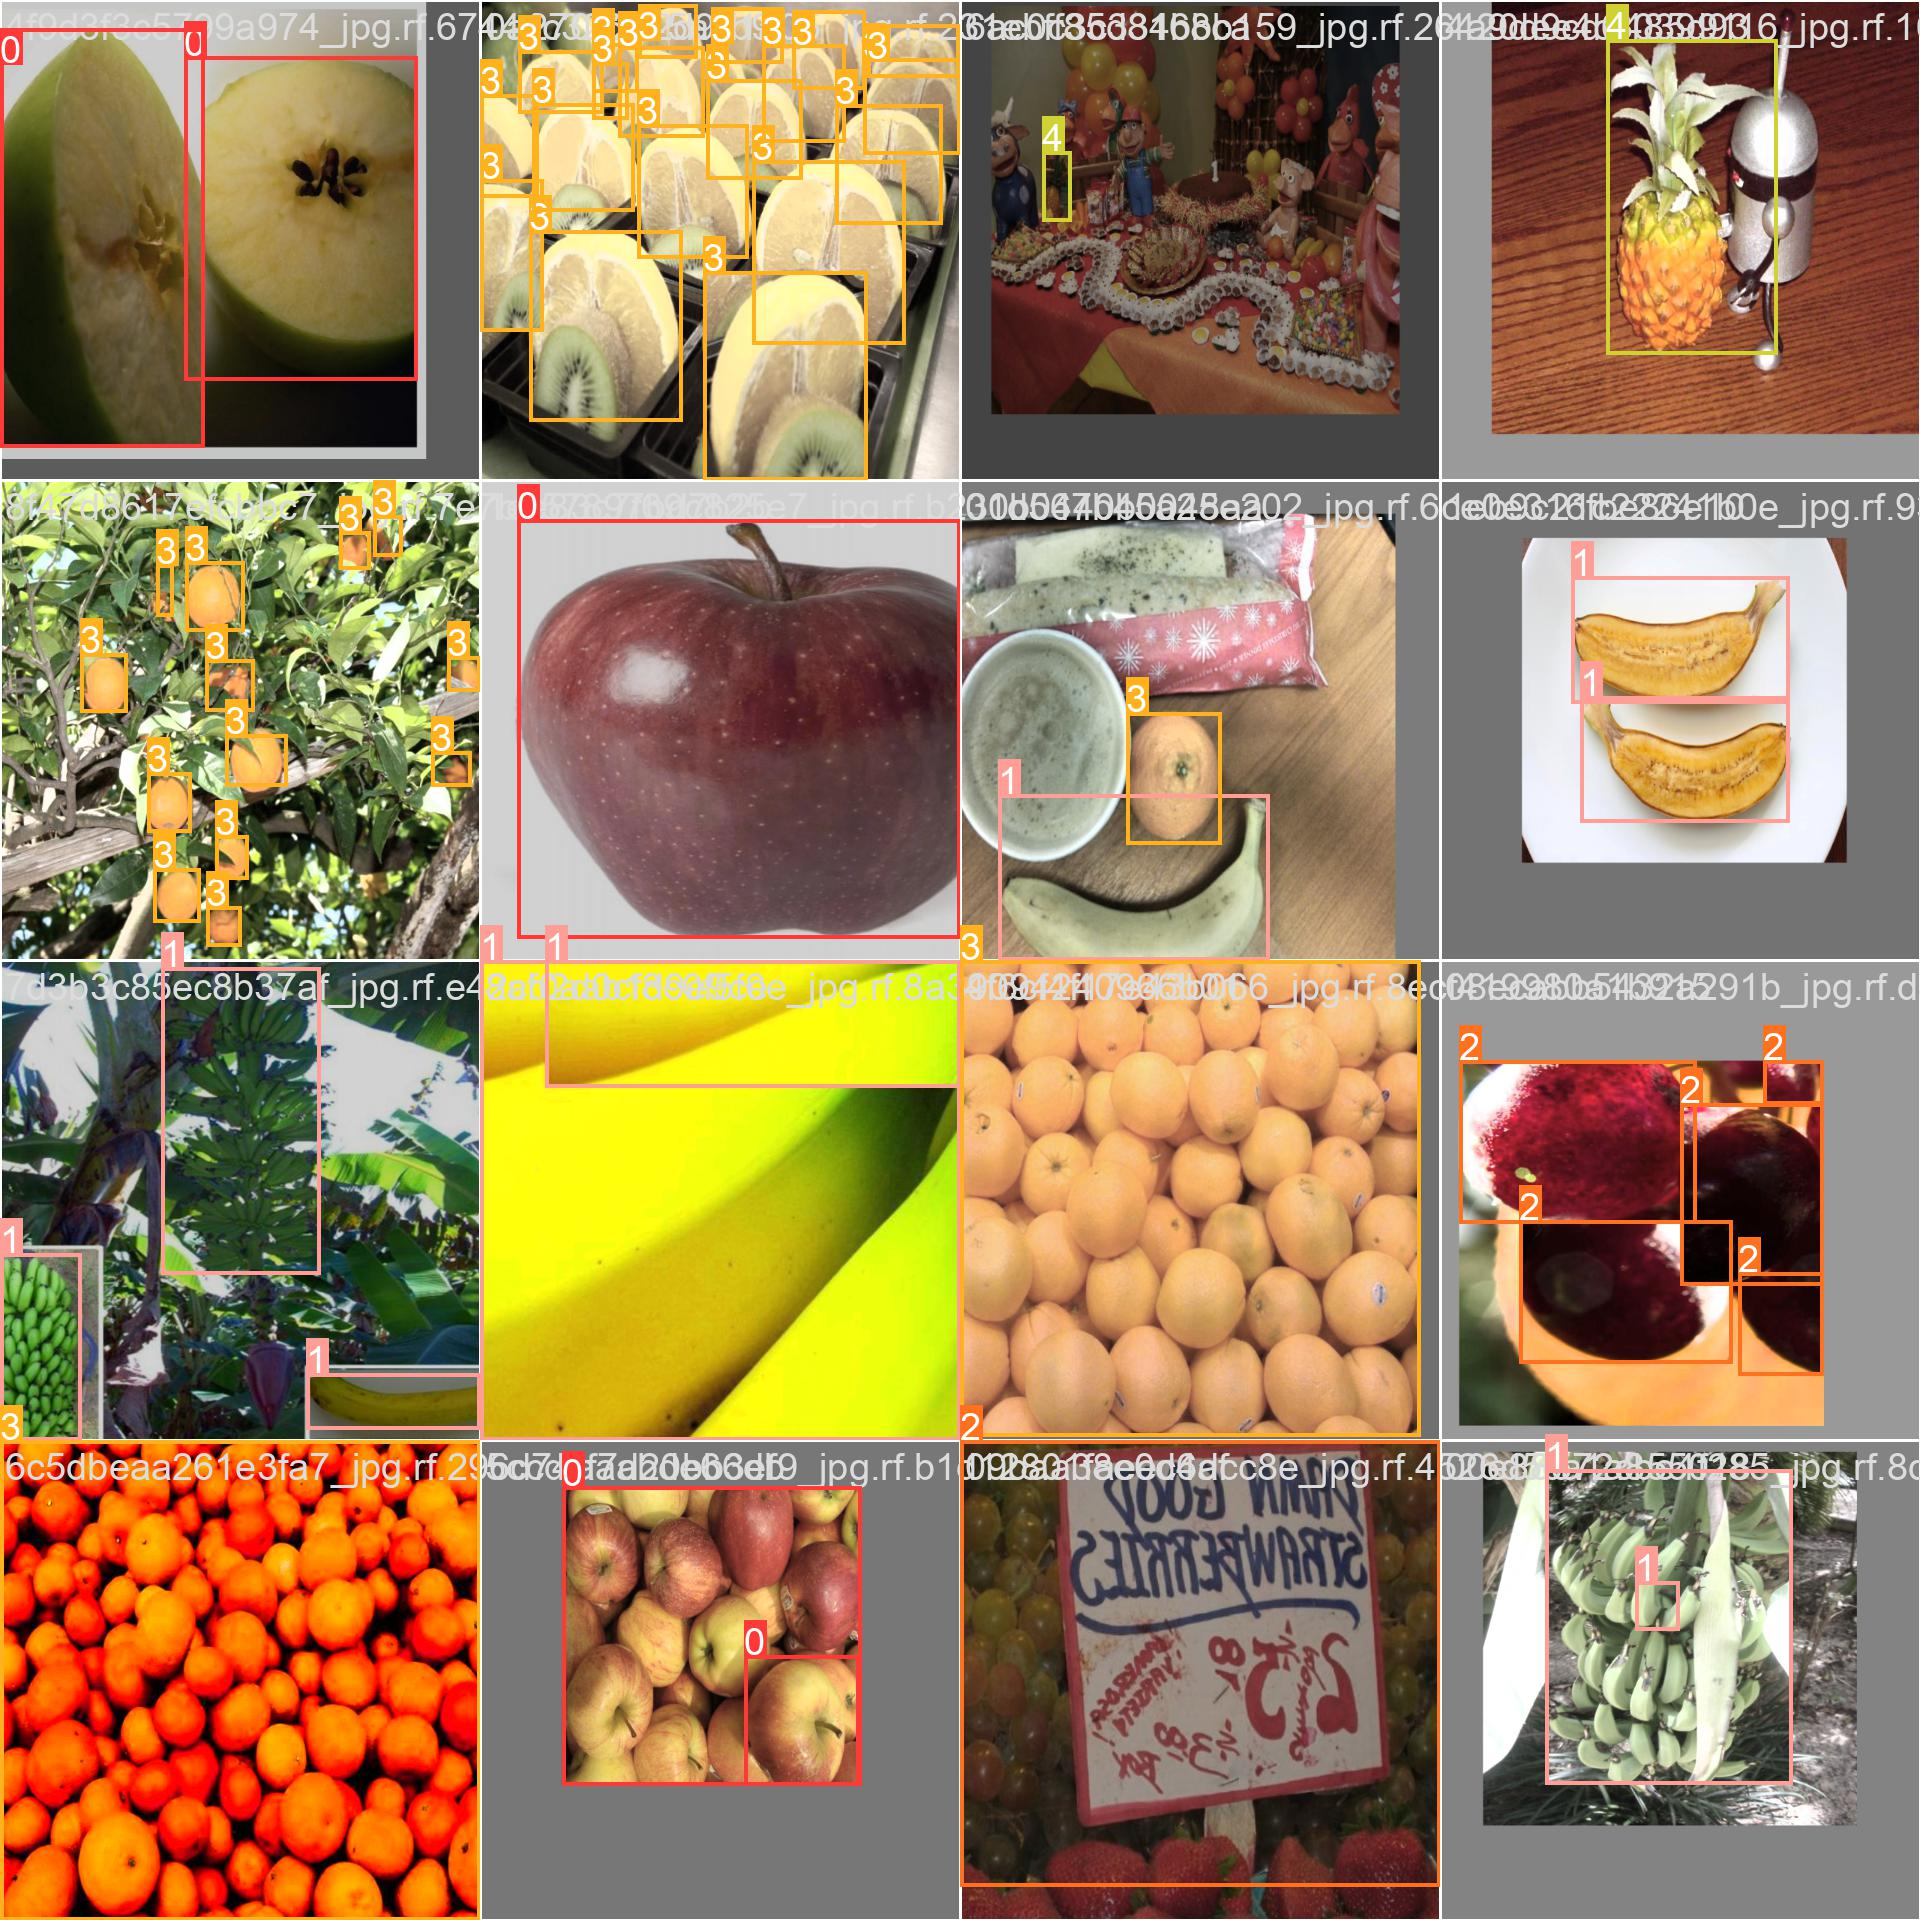

In [ ]:
from IPython.display import Image
display(Image("/content/Fruit-Detection-4/runs/detect/train2/train_batch1892.jpg", width=600))

In [ ]:
%cd '/content/Fruit-Detection-4'
!yolo task=detect mode=val model='/content/Fruit-Detection-4/runs/detect/train2/weights/best.pt' data='/content/Fruit-Detection-4/data.yaml'

/content/Fruit-Detection-4
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Fruit-Detection-4/valid/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100% 1005/1005 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Fruit-Detection-4/valid/images/3d3ddc3054b32eb7_jpg.rf.c7064e0a8cfb6dbc7fb5cf1340a4b75a.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 63/63 [00:17<00:00,  3.66it/s]
                   all       1005       3514       0.59      0.424      0.443      0.298
                 Apple       1005        615      0.494      0.398      0.395      0.293
                Banana       1005        444      0.621      0.455      0.487      0.296
                 Grape       1005        853      0.628      0.351      0.369      0.241
                Orange       1005       1206

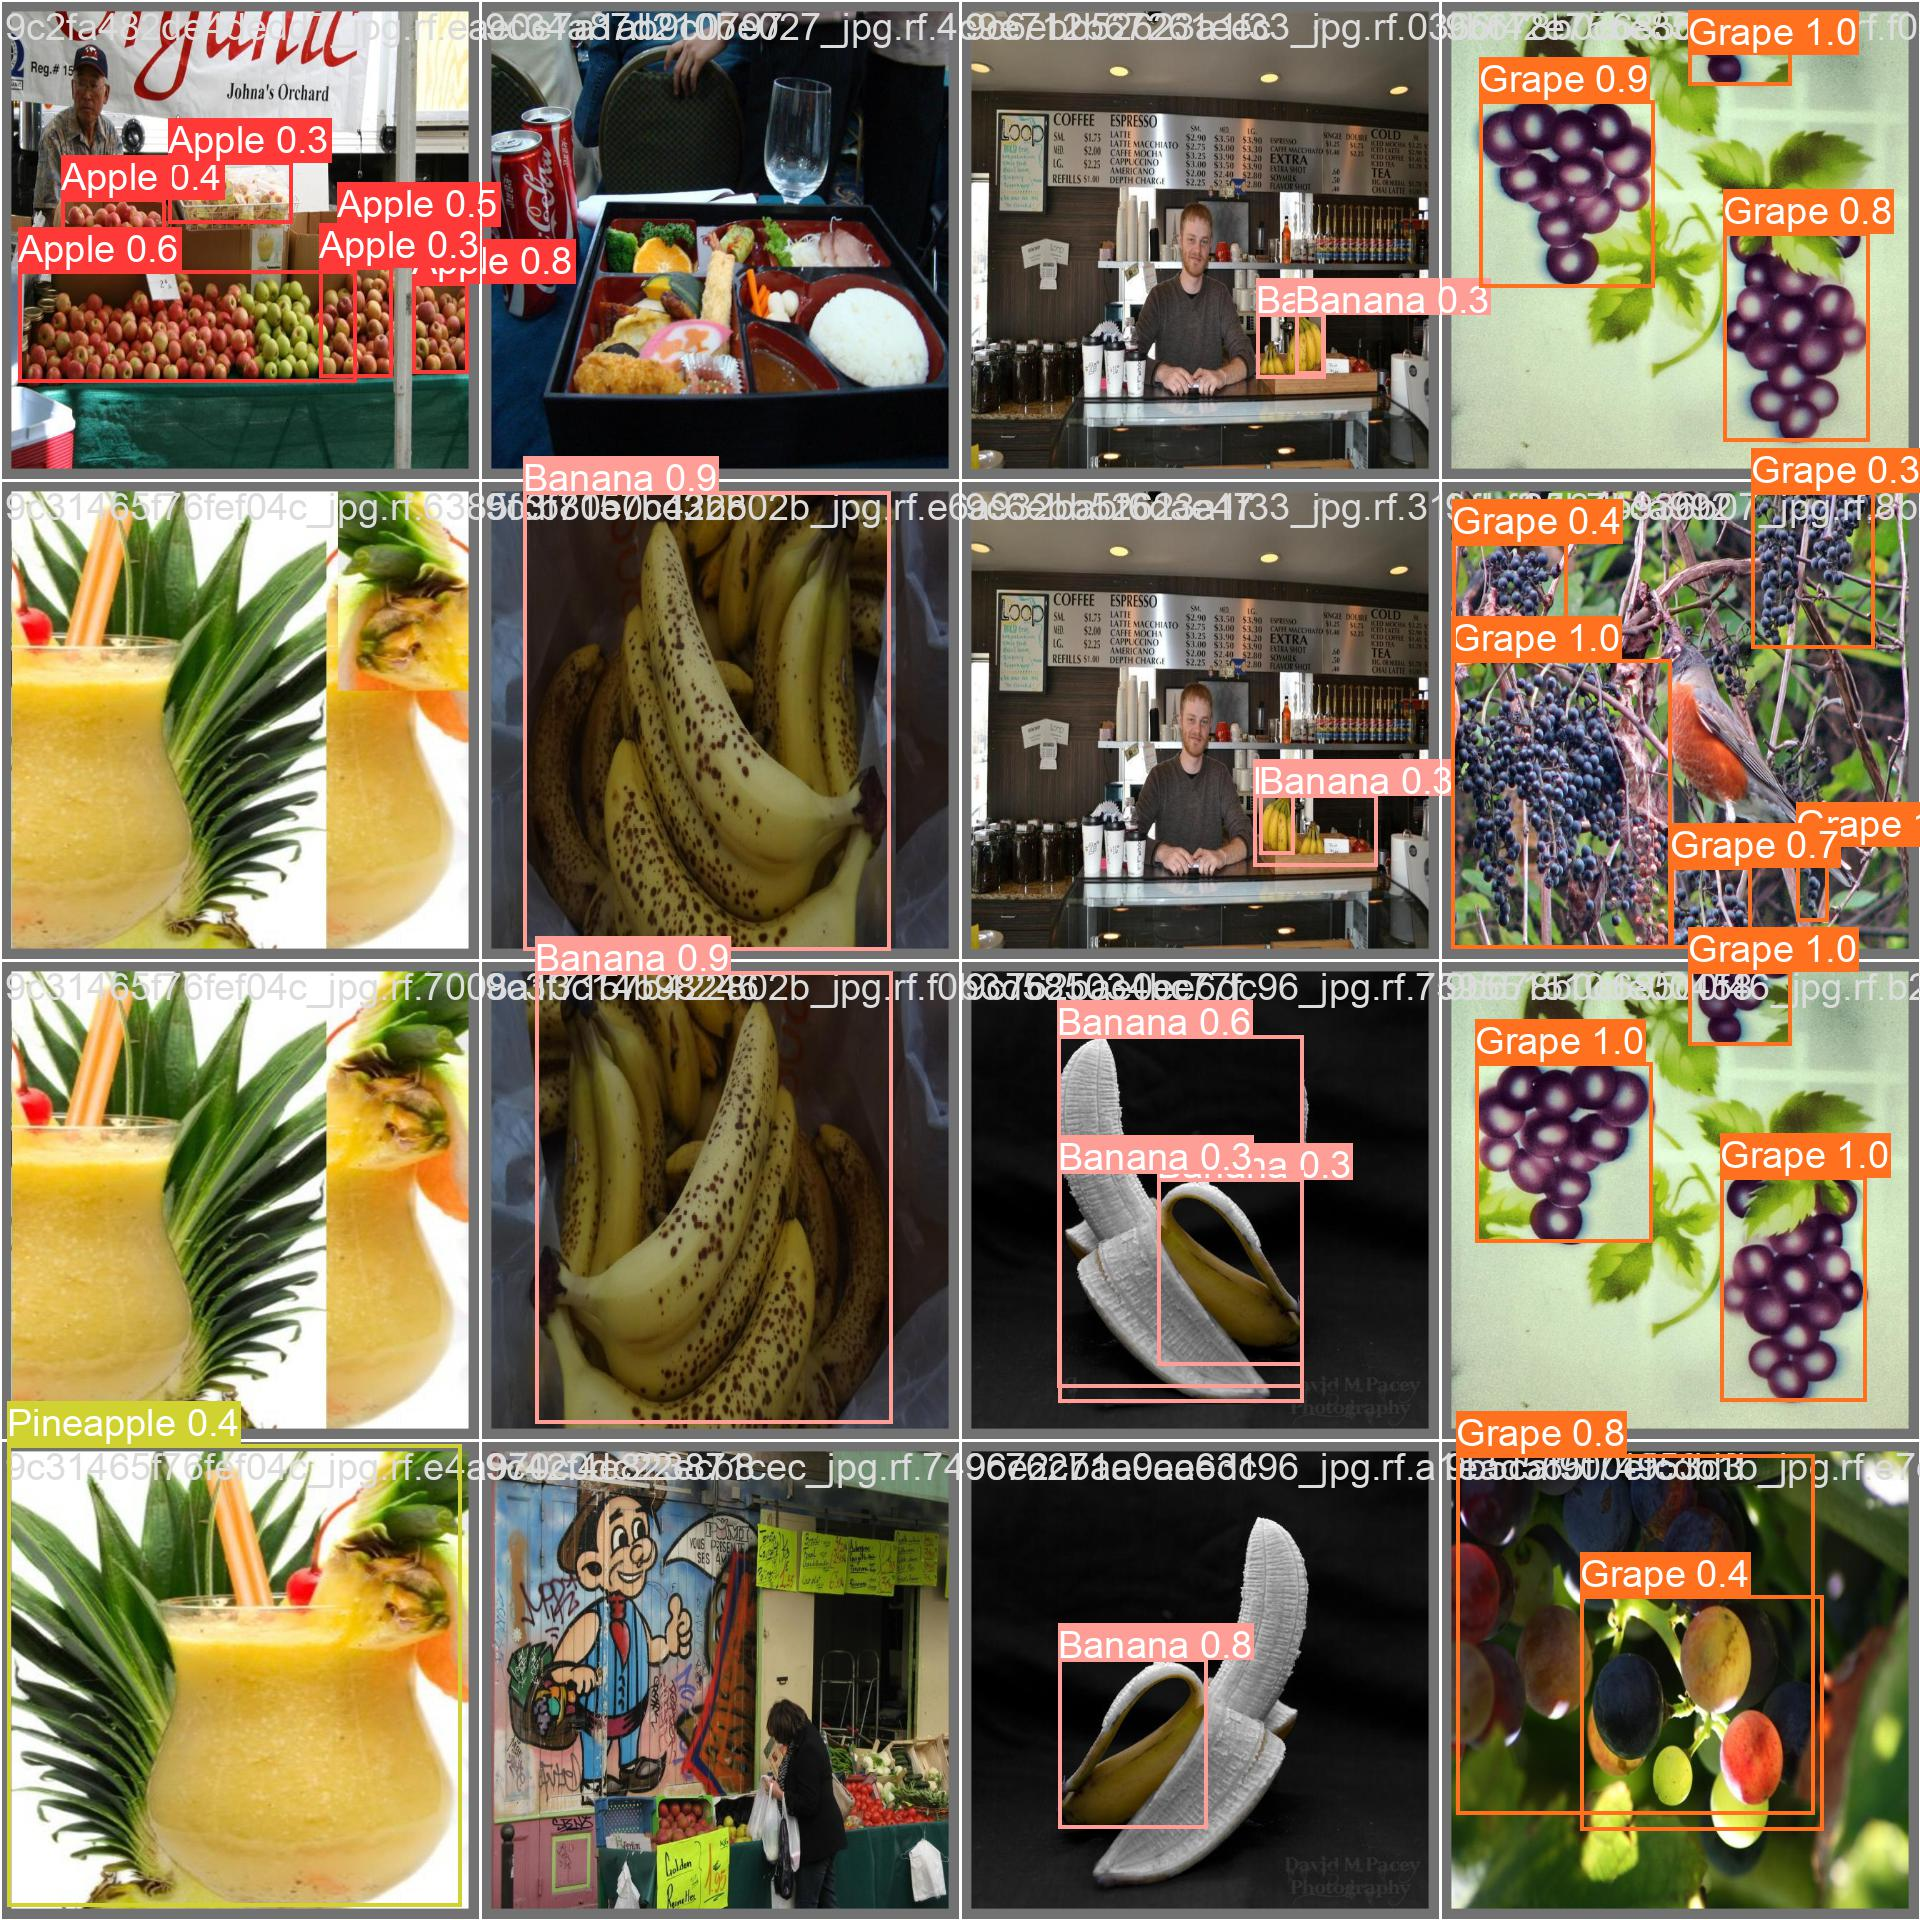

In [ ]:
from IPython.display import Image
display(Image("/content/Fruit-Detection-4/runs/detect/val2/val_batch1_pred.jpg", width=600))

In [ ]:
%cd '/content/Fruit-Detection-4'
!yolo task=detect mode=predict model='/content/Fruit-Detection-4/runs/detect/train2/weights/best.pt' conf=0.25 source='/content/Fruit-Detection-4/test/images' save=True

/content/Fruit-Detection-4
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/457 /content/Fruit-Detection-4/test/images/000aee0af66d4237_jpg.rf.30334f032de5c3e683d1c9640219d84a.jpg: 640x640 1 Watermelon, 17.5ms
image 2/457 /content/Fruit-Detection-4/test/images/000d9c59687b509b_jpg.rf.407b0fd8e7e228a3b857c97810afd1ed.jpg: 640x640 (no detections), 17.1ms
image 3/457 /content/Fruit-Detection-4/test/images/000e4e7ed48c932d_jpg.rf.5ff0995de703d9b58796123086ea55e4.jpg: 640x640 1 Orange, 17.1ms
image 4/457 /content/Fruit-Detection-4/test/images/00149fd0a01cc623_jpg.rf.478252dc24dcf46603ded976f51e99e9.jpg: 640x640 1 Orange, 1 Watermelon, 17.3ms
image 5/457 /content/Fruit-Detection-4/test/images/006e0a3d99d16d60_jpg.rf.8a39a17f6d4572b963a607be1d96507e.jpg: 640x640 1 Grape, 17.1ms
image 6/457 /content/Fruit-Detection-4/test/images/0074691e66aa85c0_jpg.rf.4cd099adf44fc84

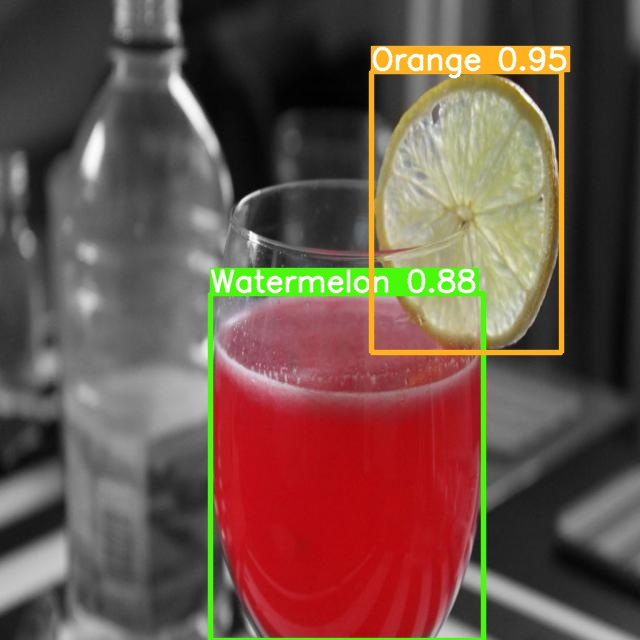

In [ ]:
from IPython.display import Image
display(Image("/content/Fruit-Detection-4/runs/detect/predict/00149fd0a01cc623_jpg.rf.478252dc24dcf46603ded976f51e99e9.jpg", width=600))

In [ ]:
from IPython.display import Image
display(Image("/content/Fruit-Detection-4/runs/detect/predict/00149fd0a01cc623_jpg.rf.478252dc24dcf46603ded976f51e99e9.jpg", width=600))

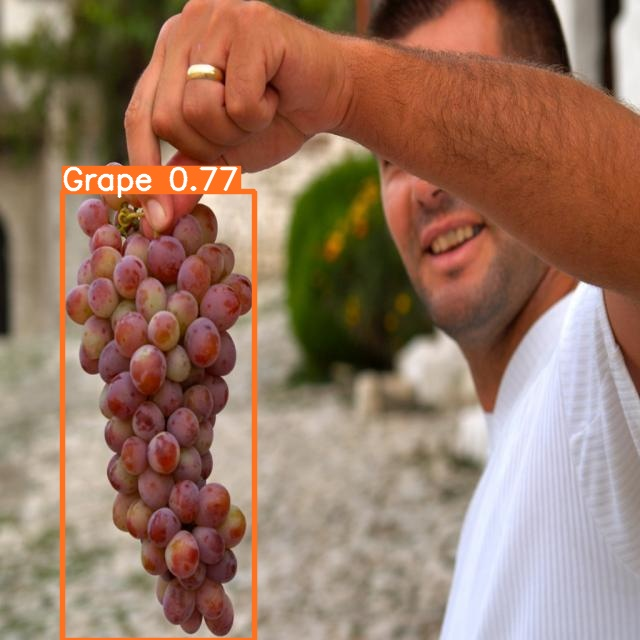

In [ ]:
from IPython.display import Image
display(Image("/content/Fruit-Detection-4/runs/detect/predict/009b02d58c46ed73_jpg.rf.3bbb11fdc83f1db4fe655052ba4b4519.jpg", width=600))

In [ ]:
!yolo task=detect mode=predict model='/content/Fruit-Detection-4/runs/detect/train2/weights/best.pt' conf=0.25 source='/content/Fruit-Detection-4/runs/download.jpg' save=True

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/Fruit-Detection-4/runs/download.jpg: 384x640 1 Banana, 15.6ms
Speed: 0.5ms preprocess, 15.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


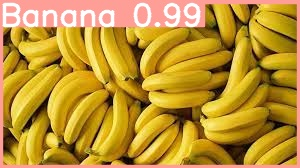

In [ ]:
from IPython.display import Image
display(Image("/content/Fruit-Detection-4/runs/detect/predict2/download.jpg", width=600))

In [ ]:
project.version(4).deploy(model_type="yolov8", model_path='/content/Fruit-Detection-4/runs/detect/train2')

Dependency ultralytics<=8.0.20 is required but found version=8.0.53, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/detection-g824o/fruit-detection-hgqya/deploy/4
Share your model with the world at: https://universe.roboflow.com/detection-g824o/fruit-detection-hgqya/model/4
